# __Car Price Prediction__

__Problem Statement__

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

The factors affecting the car prices in the American Markets may be very different from the Chinese Markets, the company wants to :

1. Identify the most significant variables that can be used in predicting the price of a car like ....

2. Create a model using these significant variables. SInce we are dealing with linear regression using multiple variables, a Multiple Linear Regression Model needs to be developed

3. Check the accuracy of the model built

__Business Goal__

The company would then use these significan predictor variables and the model to

1. Understand better the Car pricing dynamics in the American Markets

2. Understand the price variation with the predictor(independent) variables.

3. Make necessary changes/modifications/manipulations to design of the car, business strategies, etc.

## Step 1: Read and understand Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import numpy and pandas packages 
import numpy as np
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Set the columns displayed to 150 to be able to view the entire dataset at once
pd.set_option('display.max_columns', 150)

In [4]:
df_CarPrice = pd.read_csv("C:/Users/hp/Desktop/CarPrice_Assignment.csv")

# Check the head of the dataset
df_CarPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df_CarPrice.shape

(205, 26)

In [6]:
df_CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
df_CarPrice.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df_CarPrice.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

### Missing values


In total there are 205 rows & 26 columns in the dataset. Quite a few categorical variables. Lets check for missing values

In [9]:
missing_values = pd.DataFrame((df_CarPrice.isnull().sum()/len(df_CarPrice))*100, columns = ['Missing%']).sort_values('Missing%',ascending = False)
missing_values[missing_values['Missing%'] != 0].count()

Missing%    0
dtype: int64

In [10]:
missing_values

,Missing%
car_ID,0.0
symboling,0.0
highwaympg,0.0
citympg,0.0
peakrpm,0.0
horsepower,0.0
compressionratio,0.0
stroke,0.0
boreratio,0.0
fuelsystem,0.0


No missing values!

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where we'll also identify if some predictors directly have a strong association with the outcome variable
We'll visualise our data using matplotlib and seaborn.

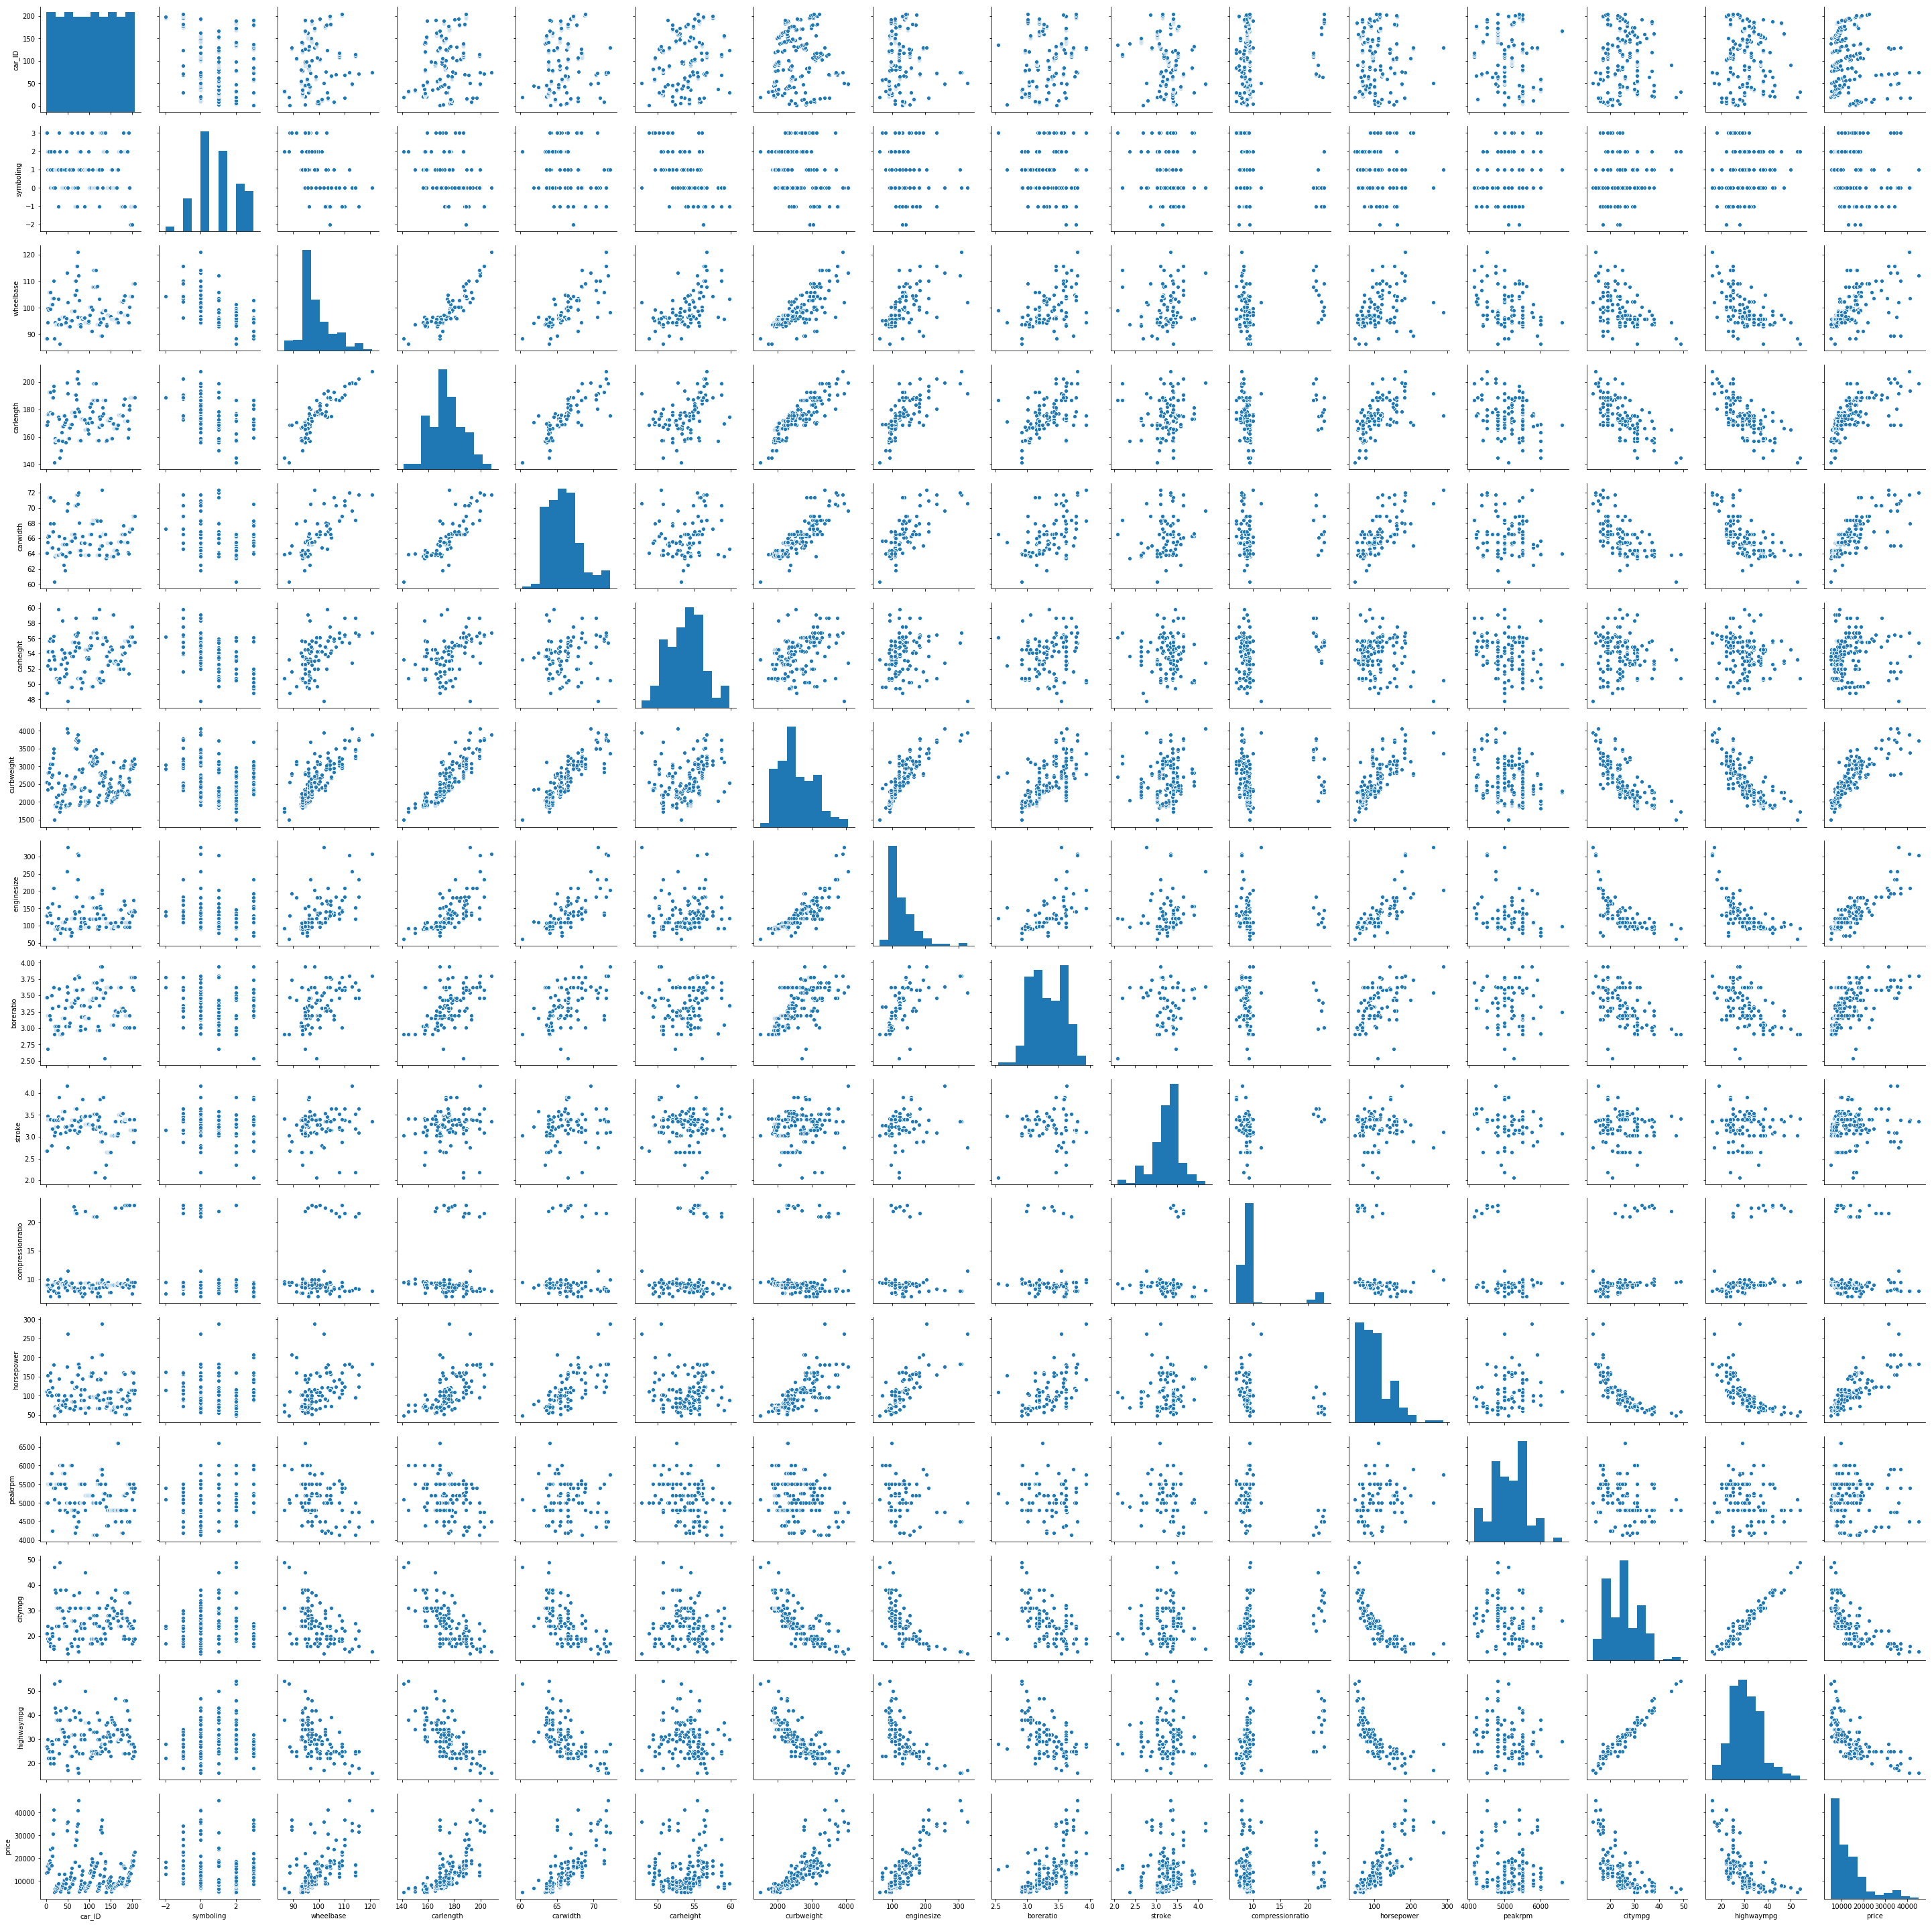

In [11]:
sns.pairplot(df_CarPrice)
plt.show()

Although, the plots are not very legible due to the high number of variables, some of the inferences are as follows:

1. Price is having linear correlation with variables like carlenght, carwidth, curbweight, boreratio, horsepower, citympg, highwaympg
2. There is strong correlation between predictors(multicollinearity) like citympg and highwaympg, wheelbase and carlength, carlength and curbweight etc.

Since the number of variables is very high and these would increase after creation of additional dummy variables (and derived variables), these correlations would be handled as part feature selection using RFE, p-value and VIF.

(0, 30000)

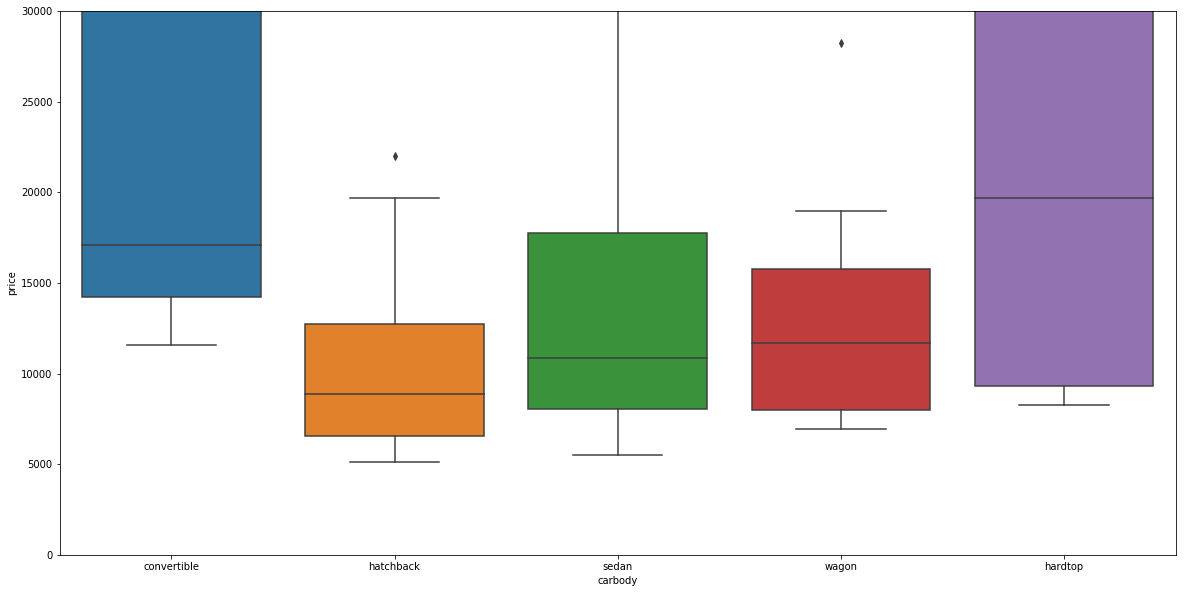

In [12]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df_CarPrice['carbody'], y=df_CarPrice['price'])
plt.ylim(0,30000)

In [13]:
# Create a list of categorical variables
cat_vars = list(df_CarPrice.select_dtypes(include='object').columns)

# Create a list of numeric variables
num_vars = list(df_CarPrice.select_dtypes(exclude='object').columns)

Although the coulmn 'symboling' has numeric values, it is actually a categorical variables with categories for risk rating of the car ranging from -3 to +3. Hence, we need to include this variable to the list of categorical variables.

In [14]:
# Remove 'symboling' from list of numeric variables and add to list of categorical variables

num_vars.remove('symboling')
cat_vars.append('symboling')

In [15]:
cat_vars

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'symboling']

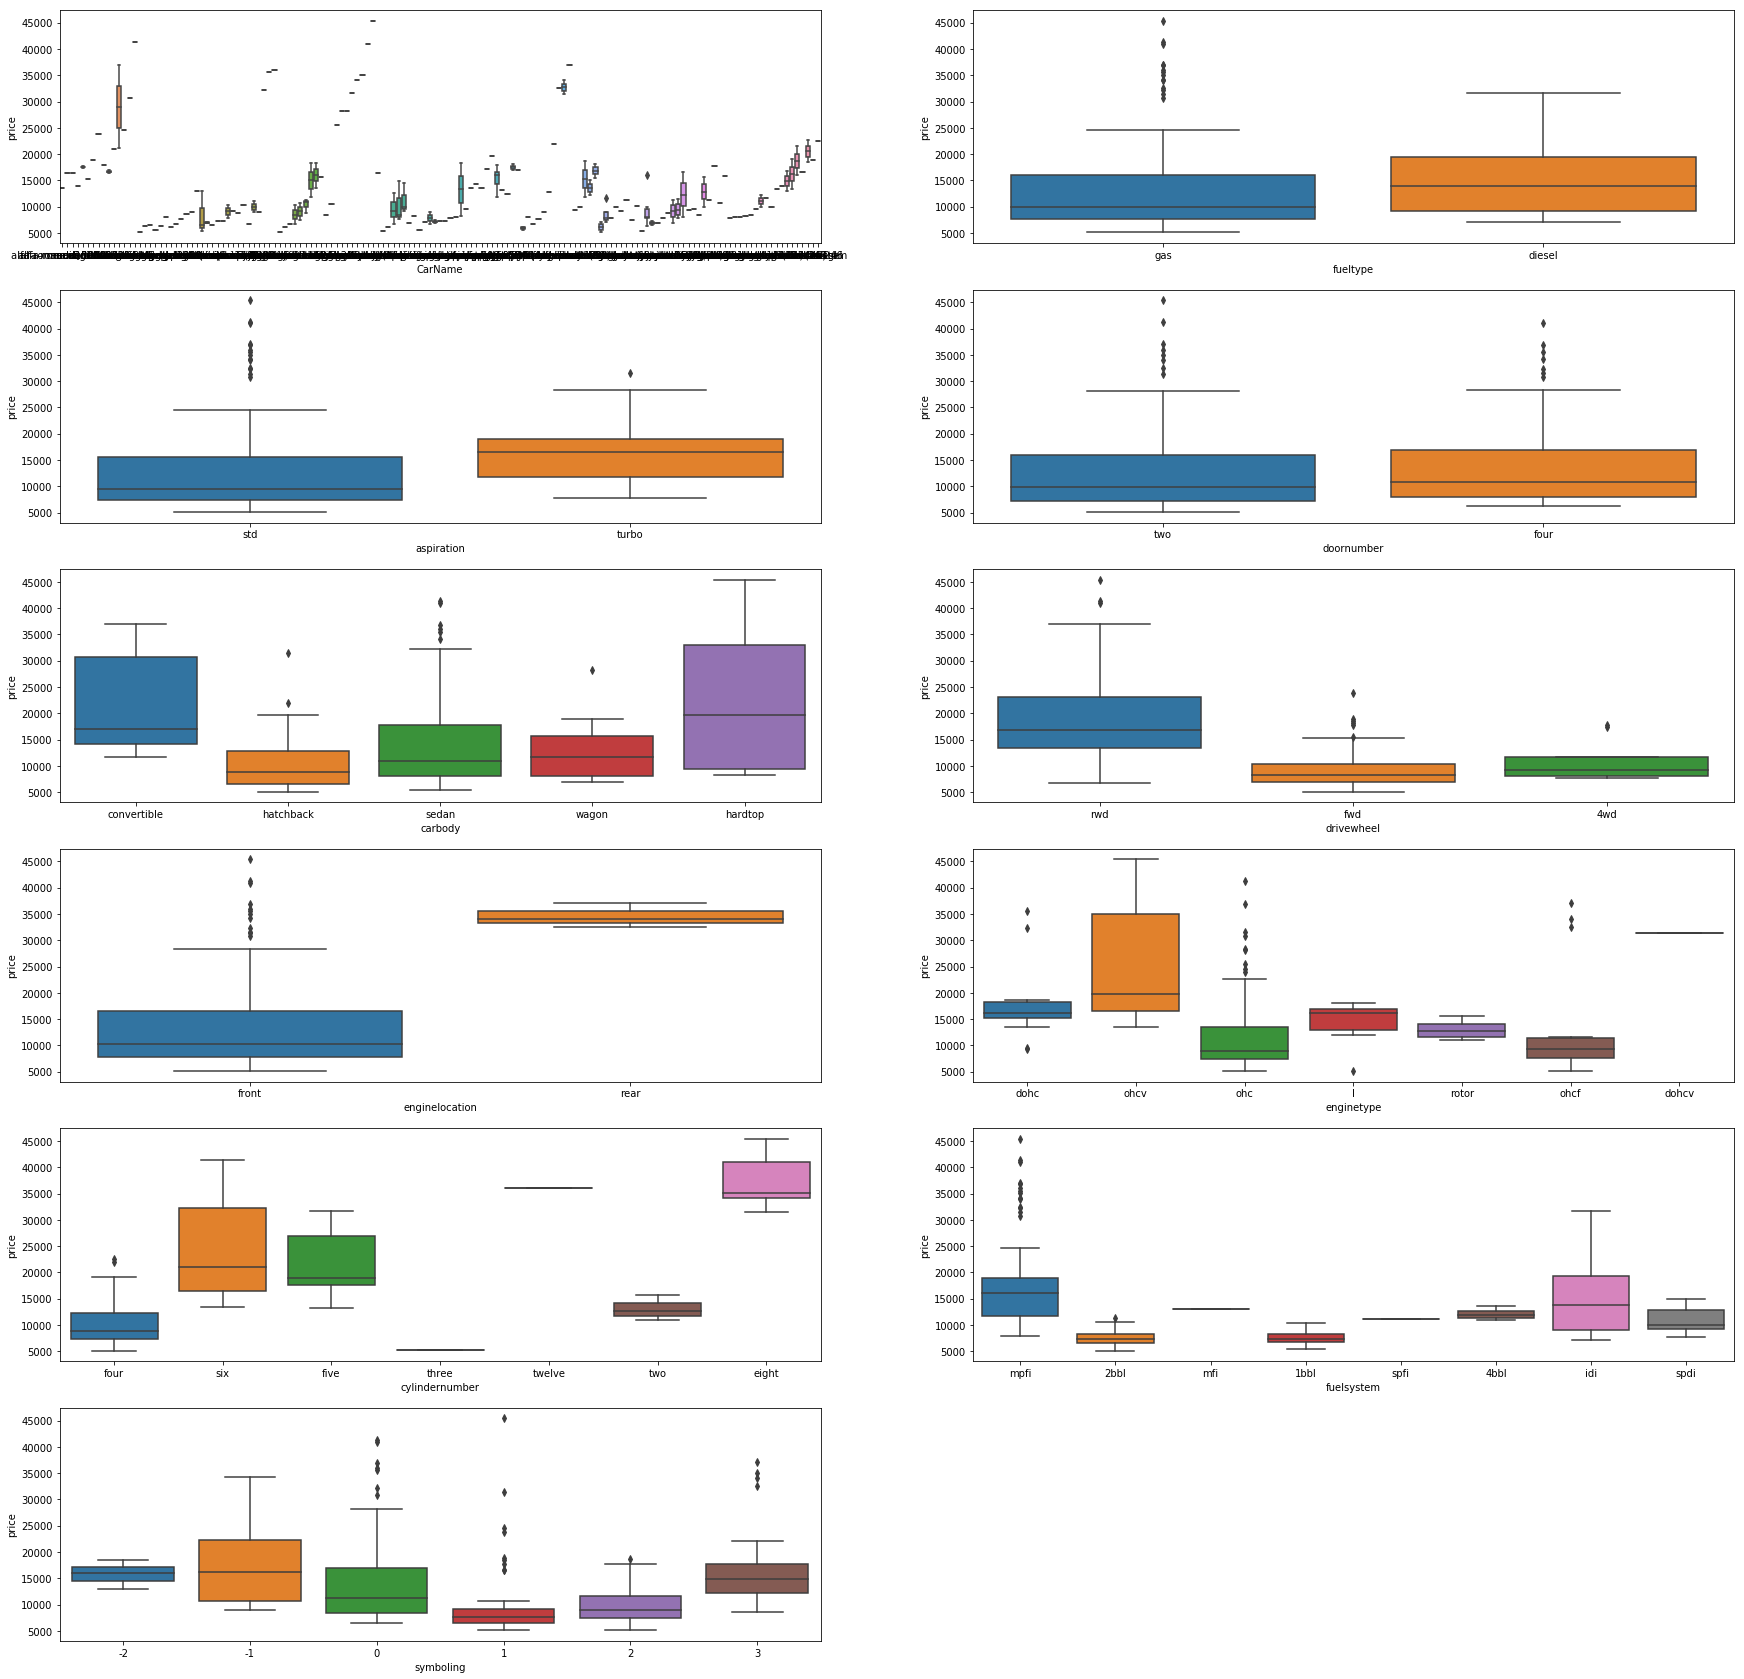

In [16]:
# Create box plots
plt.figure(figsize=(30, 30))
for idx,cat_var in enumerate(cat_vars):
    plt.subplot(6,2,idx+1)
    sns.boxplot(x = cat_var, y = 'price', data = df_CarPrice)
plt.show()

## Step 3: Data Preparation

Check for any data quality issues

Check for duplicate data

Creation of Dummy Variables


In [17]:
# Check if there are any null values in the dataset
df_CarPrice.isnull().values.any()

False

In [18]:
# Check if there are any duplicate rows
df_CarPrice.duplicated().sum()

0

In [19]:
df_CarPrice.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [20]:
# The column 'car_ID' can be dropped as it will not be of any significance in the analysis.
df_CarPrice.drop('car_ID',axis=1,inplace=True)

# Drop 'car_ID' from the list of numerical variables present in the 'num_vars' list 
num_vars.remove('car_ID')

# Confirm droppin gof the 'car_ID' column
df_CarPrice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
# The 'CarName' column is comprised of two parts (seperated by space, '-') : 
# The first word is the name of 'car company' and the second is the 'car model' 
# Retain only the name of the 'car company' for this analysis.
# Also, we need standardize the name of the 'car company' by converting to lower case.

df_CarPrice['CarName'] = df_CarPrice.CarName.apply(lambda x : x.lower().replace('-',' ').split()[0])

# Check the first few rows of the dataset

df_CarPrice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
# Check unique values(categories) present in the categorical attributes
#cat_vars = list(df_CarPrice.select_dtypes(include='object').columns)

for col in cat_vars:
    print("Column Name : {}\n Number of Categories: {}\n Unique Values : {} \n"\
          .format(col , df_CarPrice[col].nunique(), df_CarPrice[col].unique()))

Column Name : CarName
 Number of Categories: 27
 Unique Values : ['alfa' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar' 'maxda'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota' 'toyouta'
 'vokswagen' 'volkswagen' 'vw' 'volvo'] 

Column Name : fueltype
 Number of Categories: 2
 Unique Values : ['gas' 'diesel'] 

Column Name : aspiration
 Number of Categories: 2
 Unique Values : ['std' 'turbo'] 

Column Name : doornumber
 Number of Categories: 2
 Unique Values : ['two' 'four'] 

Column Name : carbody
 Number of Categories: 5
 Unique Values : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

Column Name : drivewheel
 Number of Categories: 3
 Unique Values : ['rwd' 'fwd' '4wd'] 

Column Name : enginelocation
 Number of Categories: 2
 Unique Values : ['front' 'rear'] 

Column Name : enginetype
 Number of Categories: 7
 Unique Values : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] 

Column Name 

In [23]:
# As can be noticed, there are a few quality issues wrt names of the car company name being mis-spelt
df_CarPrice.CarName.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen',
       'vw', 'volvo'], dtype=object)

In [24]:
# Correct the data quality issues as illustrated below
# Change 'maxda' to 'mazda'
# Change 'porcshce' to 'porsche'
# Change 'toyouta' to 'toyota'
# Change 'vokswagen' and 'vw' to 'volkswagen'

replace_carname = {'maxda' : 'mazda', 'porcshce':'porsche', 'toyouta':'toyota','vokswagen':'volkswagen', 'vw':'volkswagen'}

df_CarPrice.CarName.replace(replace_carname,regex=True,inplace=True)

In [25]:
df_CarPrice.CarName.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [26]:
df_CarPrice.CarName.value_counts()

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
volkswagen    12
subaru        12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
alfa           3
jaguar         3
chevrolet      3
renault        2
mercury        1
Name: CarName, dtype: int64

(0, 30000)

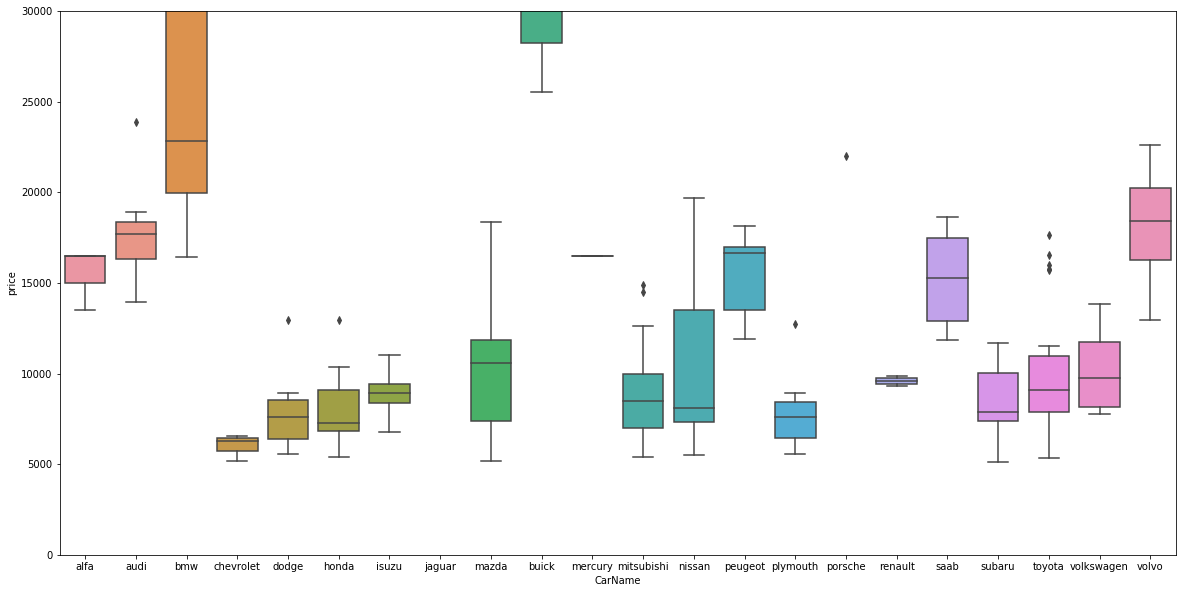

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df_CarPrice['CarName'], y=df_CarPrice['price'])
plt.ylim(0,30000)

In [28]:
# Check data quality issues in 'fuelsystem'
df_CarPrice.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [29]:
# 'mfi' and 'mpfi are the same. Similarly, 'spfi' and 'spdi' are the same. Replace the former type to the later.

df_CarPrice.fuelsystem.replace('mfi','mpfi',inplace=True)
df_CarPrice.fuelsystem.replace('spfi','spdi',inplace=True)

In [30]:
# Check data quality issues in enginetype
df_CarPrice.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [31]:
# No enginetype 'dohcv'. Replace with 'dohc'.
df_CarPrice.enginetype.replace('dohcv','dohc',inplace=True)

## Categorical Variables

In [32]:
# Identify the number of categories in each of the categorical variables
df_CarPrice[cat_vars].nunique().sort_values()

fueltype           2
aspiration         2
doornumber         2
enginelocation     2
drivewheel         3
carbody            5
enginetype         6
fuelsystem         6
symboling          6
cylindernumber     7
CarName           22
dtype: int64

Categorical variables with only two categories i.e, 'fueltype', 'aspiration', 'doornumber' and 'enginelocation' can be encoded using Binary-Encoding mechanism.

The columns 'drivewheel', 'carbody', 'enginetype', 'cylindernumber' and 'fuelsystem' can be encoded using the Dummy-Encoding mechanism where in if the categorical variable has 'n' categories then 'n-1' new columns are created with 0's and 1's indicating the existennce of a particular category.

'CarName' column has the various car companies which are being consided for the analysis. ,'symboling' column has the insurance risk rating ranging from -3(safest) to +3(risky). One-Hot-Encoding mechanism (each category is converted to a seperate column i.e, 'n' categories would result in 'n' new columns) can be used to encode these columns so that all the car companies and rsik ratings are retained in the resultant dataset.

## Binary-Encoding the categorical variables

In [33]:
# Binary-Encoding the columns 'fueltype', 'aspiration', 'doornumber' and 'enginelocation'
df_CarPrice['fueltype'] = df_CarPrice['fueltype'].map({'gas': 1, 'diesel': 0})
df_CarPrice['aspiration'] = df_CarPrice['aspiration'].map({'std': 1, 'turbo': 0})
df_CarPrice['doornumber'] = df_CarPrice['doornumber'].map({'four': 1, 'two': 0})
df_CarPrice['enginelocation'] = df_CarPrice['enginelocation'].map({'front': 1, 'rear': 0})

In [34]:
df_CarPrice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [35]:
#Value mapping

In [36]:

df_CarPrice.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [37]:
# Map cylinder number in words to numericals.
df_CarPrice['cylindernumber'] = df_CarPrice['cylindernumber'].\
map({'four': 4, 'six': 6, 'five':5, 'eight':8,'two':2,'twelve':12,'three':3})

In [38]:
df_CarPrice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa,1,1,0,convertible,rwd,1,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa,1,1,0,hatchback,rwd,1,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,1,1,1,sedan,fwd,1,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,1,1,1,sedan,4wd,1,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [39]:
df_CarPrice.shape

(205, 25)

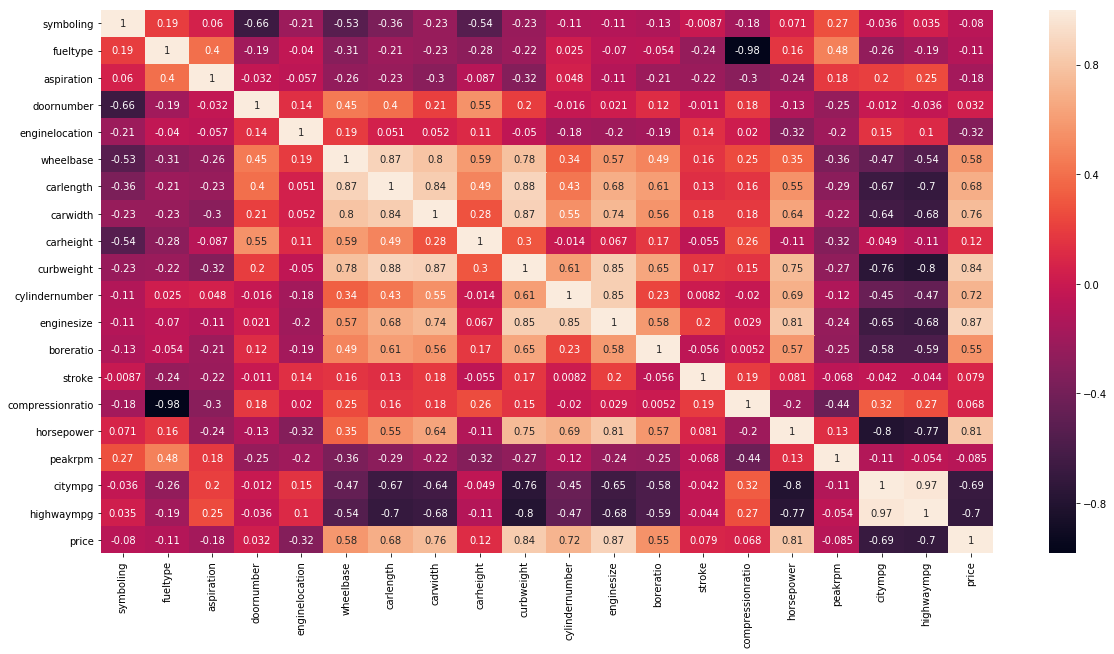

In [40]:
plt.figure(figsize = (20,10))  
sns.heatmap(df_CarPrice.corr(),annot = True)

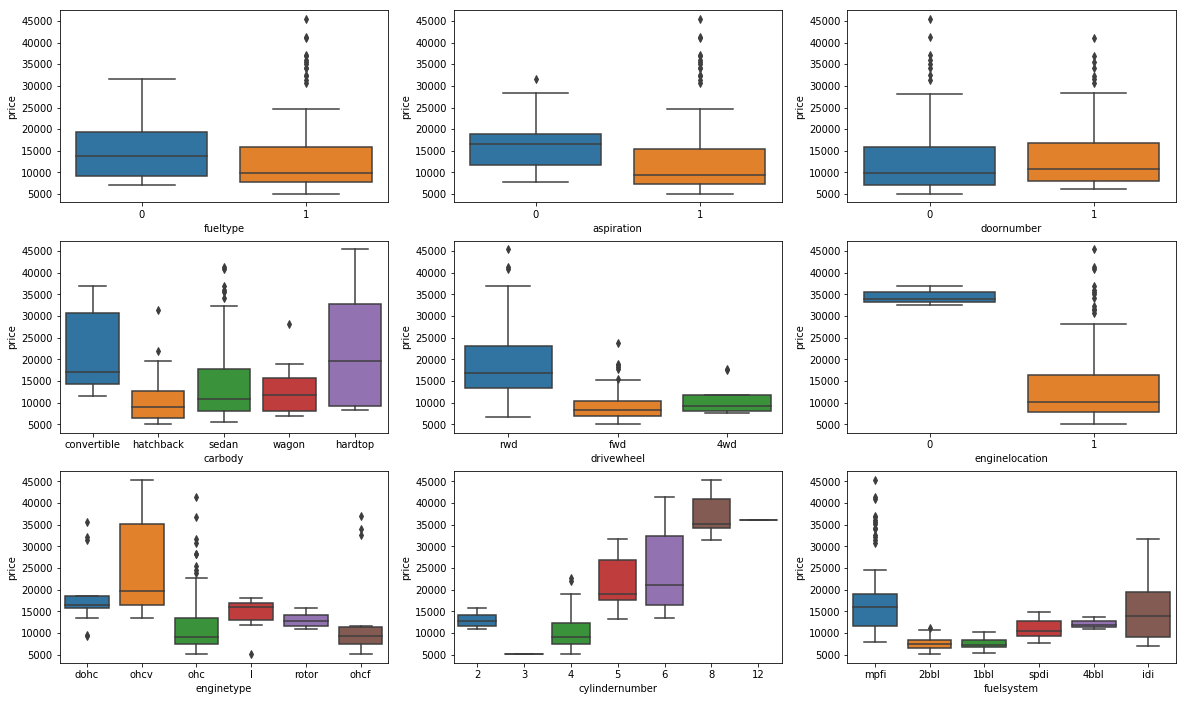

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df_CarPrice)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df_CarPrice)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df_CarPrice)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_CarPrice)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_CarPrice)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_CarPrice)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_CarPrice)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_CarPrice)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_CarPrice)
plt.show()

Turbocharged cars are more expensive, so are convertible and rear wheel drive ones 
Rear engine cars are very expensive, this would be the sportscar types 
More cylinders also means more power, hence more expensive

We can also visualise some of these categorical features parallely by using the hue argument. Below is the plot for carbody with doornumber as the hue.

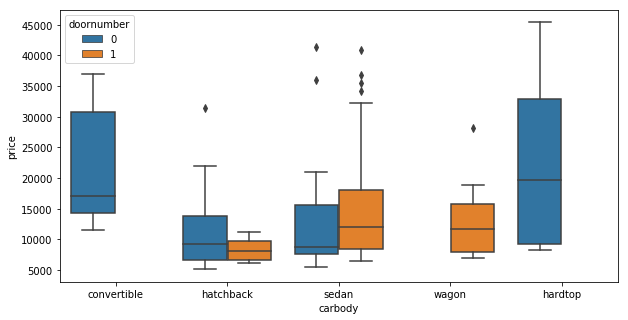

In [42]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'doornumber', data = df_CarPrice)
plt.show()

All convertibles and hardtop cars are 2 door, all wagons are 4 door obviously

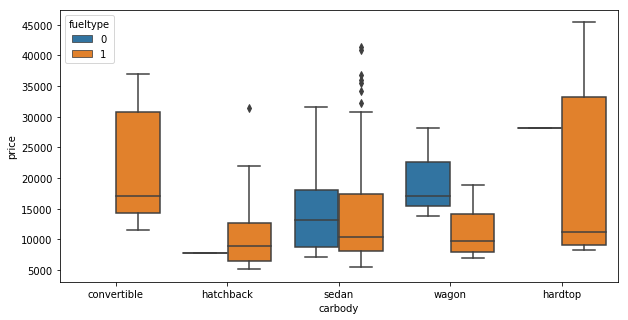

In [43]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'carbody', y = 'price', hue = 'fueltype', data = df_CarPrice)
plt.show()

Almost all convertibles, hardtops and hatchbacks are petrol powered. Diesel cars preferred for sedan or wagon body types 
Convertibles are clearly more expensive in general than the rest

## Dummy Variables

Some categorical variables have more than 2 levels. We need to convert these levels into integer as well. 
Number of dummy variables = number of unique values - 1

In [44]:
# Dummy-Encoding the columns 'drivewheel','carbody','enginetype','fuelsystem' , cylindernumber

for var in ['drivewheel','carbody','enginetype','fuelsystem','cylindernumber' ]:
    temp_df = pd.get_dummies(df_CarPrice[var], prefix=var)
    df_CarPrice = pd.concat([df_CarPrice, temp_df], axis = 1)
    df_CarPrice.drop(var, axis=1, inplace = True)

# Check the first few rows to see if the Dummy-encoding has happened correctly
df_CarPrice.head()

,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12
0,3,alfa,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,3,alfa,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,alfa,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2,audi,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2,audi,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [45]:
df_CarPrice.shape

(205, 47)

## One-Hot-Encoding

In [46]:
# For CarName variable
temp_df = pd.get_dummies(df_CarPrice['CarName'], prefix='CarName') # by not setting drop_first=True, One-Hot-Encoding is achieved
df_CarPrice = pd.concat([df_CarPrice, temp_df], axis = 1)
df_CarPrice.drop('CarName', axis=1, inplace = True)

# For symboling variable
temp_df = pd.get_dummies(df_CarPrice['symboling'], prefix='symboling') # by not setting drop_first=True, One-Hot-Encoding is achieved
df_CarPrice = pd.concat([df_CarPrice, temp_df], axis = 1)
df_CarPrice.drop('symboling', axis=1, inplace = True)

# Check the first few rows to see if the One-Hot-encoding has happened correctly
df_CarPrice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,CarName_alfa,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [47]:
df_CarPrice.shape

(205, 73)

In [48]:
df_CarPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 73 columns):
fueltype               205 non-null int64
aspiration             205 non-null int64
doornumber             205 non-null int64
enginelocation         205 non-null int64
wheelbase              205 non-null float64
carlength              205 non-null float64
carwidth               205 non-null float64
carheight              205 non-null float64
curbweight             205 non-null int64
enginesize             205 non-null int64
boreratio              205 non-null float64
stroke                 205 non-null float64
compressionratio       205 non-null float64
horsepower             205 non-null int64
peakrpm                205 non-null int64
citympg                205 non-null int64
highwaympg             205 non-null int64
price                  205 non-null float64
drivewheel_4wd         205 non-null uint8
drivewheel_fwd         205 non-null uint8
drivewheel_rwd         205 non-null uin

## Step 4: Splitting the Data into Training and Testing Sets

In [49]:
from sklearn.model_selection import train_test_split

np.random.seed(0) # Initialize RandomState

# Split Data in the ratio Train:Test = 70%:30
df_train, df_test = train_test_split(df_CarPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Applying MinMaxScaler to the original numeric variables

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
num_vars

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [52]:
# Apply scaler() to all the original numeric columns
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,CarName_alfa,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
122,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
125,1,1,0,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
166,1,1,0,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,1,0,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
199,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [53]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi,cylindernumber_2,cylindernumber_3,cylindernumber_4,cylindernumber_5,cylindernumber_6,cylindernumber_8,cylindernumber_12,CarName_alfa,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.909091,0.818182,0.559441,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.055944,0.594406,0.349650,0.027972,0.020979,0.342657,0.475524,0.132867,0.076923,0.062937,0.685315,0.083916,0.062937,0.027972,0.055944,0.349650,0.020979,0.090909,0.440559,0.041958,0.027972,0.006993,0.741259,0.062937,0.132867,0.020979,0.006993,0.020979,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.013986,0.090909,0.349650,0.300699,0.118881,0.125874
std,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.230621,0.492733,0.478536,0.165472,0.143818,0.476266,0.501156,0.340624,0.267406,0.243703,0.466023,0.278236,0.243703,0.165472,0.230621,0.478536,0.143818,0.288490,0.498199,0.201198,0.165472,0.083624,0.439483,0.243703,0.340624,0.143818,0.083624,0.143818,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.117845,0.288490,0.478536,0.460174,0.324786,0.332873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.000000,0.000000,0.000000,0.00000

### Divide the dataframe into X and Y sets for the model building

In [54]:
y_train = df_train.pop('price')
X_train = df_train

## Recursive Feature Elimination
Since the number of independent variables is very hig, we cannot go for Manual feature selection. Hence, we need to automate the process of feature selection for which we can use RFE(Recursive Feature Elimination)

TO start with we can set the number of features to be selected to 20

In [55]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [57]:
rfe_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
print(rfe_list)

[('fueltype', False, 9), ('aspiration', False, 61), ('doornumber', False, 63), ('enginelocation', True, 1), ('wheelbase', False, 58), ('carlength', False, 55), ('carwidth', True, 1), ('carheight', False, 57), ('curbweight', False, 53), ('enginesize', True, 1), ('boreratio', False, 51), ('stroke', False, 54), ('compressionratio', True, 1), ('horsepower', False, 62), ('peakrpm', False, 56), ('citympg', False, 60), ('highwaympg', False, 59), ('drivewheel_4wd', False, 48), ('drivewheel_fwd', False, 22), ('drivewheel_rwd', False, 38), ('carbody_convertible', False, 3), ('carbody_hardtop', False, 45), ('carbody_hatchback', False, 46), ('carbody_sedan', False, 44), ('carbody_wagon', False, 47), ('enginetype_dohc', False, 43), ('enginetype_l', False, 37), ('enginetype_ohc', False, 42), ('enginetype_ohcf', False, 5), ('enginetype_ohcv', False, 28), ('enginetype_rotor', False, 7), ('fuelsystem_1bbl', False, 26), ('fuelsystem_2bbl', False, 24), ('fuelsystem_4bbl', False, 8), ('fuelsystem_idi', Tr

In [58]:
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['enginelocation', 'carwidth', 'enginesize', 'compressionratio',
       'fuelsystem_idi', 'cylindernumber_2', 'cylindernumber_3', 'CarName_bmw',
       'CarName_buick', 'CarName_jaguar'],
      dtype='object')

In [59]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'curbweight', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohc', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'cylindernumber_4', 'cylindernumber_5',
       'cylindernumber_6', 'cylindernumber_8', 'cylindernumber_12',
       'CarName_alfa', 'CarName_audi', 'CarName_chevrolet', 'CarName_dodge',
       'CarName_honda', 'CarName_isuzu', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab'

## Building model using statsmodel

In [60]:
# Adding a constant variable 
import statsmodels.api as sm

In [61]:
X_train_all = X_train.copy(deep=True)
# Adding a constant variable 
X_train_all = sm.add_constant(X_train_all,has_constant='add')

# Running the linear model
lm0 = sm.OLS(y_train,X_train_all).fit()

#Summary of our linear model
print(lm0.summary())

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_all = X_train_all.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_all
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.84e-47
Time:                        09:43:57   Log-Likelihood:                 281.35
No. Observations:                 143   AIC:                            -440.7
Df Residuals:                      82   BIC:                            -260.0
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0522    

,Features,VIF
0,fueltype,inf
45,CarName_audi,inf
51,CarName_isuzu,inf
50,CarName_honda,inf
49,CarName_dodge,inf
48,CarName_chevrolet,inf
47,CarName_buick,inf
46,CarName_bmw,inf
44,CarName_alfa,inf
53,CarName_mazda,inf


### lm1

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[selected_columns]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm1 = sm.OLS(y_train,X_train_rfe).fit()   

#Summary of our linear model
print(lm1.summary())

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     132.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.46e-64
Time:                        09:45:18   Log-Likelihood:                 188.63
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     132   BIC:                            -322.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3369      0.078  

,Features,VIF
3,compressionratio,50.93
4,fuelsystem_idi,35.38
1,carwidth,25.80
0,enginelocation,19.08
2,enginesize,17.18
9,CarName_jaguar,1.92
8,CarName_buick,1.49
5,cylindernumber_2,1.26
7,CarName_bmw,1.26
6,cylindernumber_3,1.07


In [63]:
lm1.pvalues.sort_values(ascending=False).head(2)

compressionratio    0.542799
fuelsystem_idi      0.540510
dtype: float64

We'll drop compression ratio.

## lm2

In [65]:
X_train_new = X_train_rfe.drop(['compressionratio'], axis=1)

# Adding a constant variable
import statsmodels.api as sm 
X_train_new1 = sm.add_constant(X_train_new)

# Running the linear model
lm2 = sm.OLS(y_train,X_train_new1).fit()   

#Summary of our linear model
print(lm2.summary())

# VIF
X_train_new1 = X_train_new1.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.08e-65
Time:                        09:53:15   Log-Likelihood:                 188.43
No. Observations:                 143   AIC:                            -356.9
Df Residuals:                     133   BIC:                            -327.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3219      0.074  

,Features,VIF
1,carwidth,24.82
2,enginesize,16.84
0,enginelocation,9.20
8,CarName_jaguar,1.92
7,CarName_buick,1.48
3,fuelsystem_idi,1.32
6,CarName_bmw,1.25
4,cylindernumber_2,1.22
5,cylindernumber_3,1.06


We'll drop carwidth.

## lm3

In [68]:
X_train_new50 = X_train_new.drop(['carwidth'], axis=1)

# Adding a constant variable
import statsmodels.api as sm 
X_train_new2 = sm.add_constant(X_train_new50)

# Running the linear model
lm3 = sm.OLS(y_train,X_train_new2).fit()   

#Summary of our linear model
print(lm3.summary())

# VIF
X_train_new2 = X_train_new2.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.63e-53
Time:                        10:02:17   Log-Likelihood:                 157.83
No. Observations:                 143   AIC:                            -297.7
Df Residuals:                     134   BIC:                            -271.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2372      0.090  

,Features,VIF
1,enginesize,7.28
0,enginelocation,5.15
7,CarName_jaguar,1.74
6,CarName_buick,1.47
2,fuelsystem_idi,1.26
5,CarName_bmw,1.20
3,cylindernumber_2,1.10
4,cylindernumber_3,1.04


We'll drop cylindernumber_3.

## lm4

In [69]:
X_train_new49 = X_train_new50.drop(['cylindernumber_3'], axis=1)

# Adding a constant variable
import statsmodels.api as sm 
X_train_new3 = sm.add_constant(X_train_new49)

# Running the linear model
lm4 = sm.OLS(y_train,X_train_new3).fit()   

#Summary of our linear model
print(lm4.summary())

# VIF
X_train_new3 = X_train_new3.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     118.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.22e-54
Time:                        10:05:21   Log-Likelihood:                 157.37
No. Observations:                 143   AIC:                            -298.7
Df Residuals:                     135   BIC:                            -275.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2432      0.090  

,Features,VIF
1,enginesize,7.08
0,enginelocation,4.97
6,CarName_jaguar,1.72
5,CarName_buick,1.46
2,fuelsystem_idi,1.26
4,CarName_bmw,1.20
3,cylindernumber_2,1.10


We'll drop fuelsystem_idi.

## lm5

In [70]:
X_train_new48 = X_train_new49.drop(['fuelsystem_idi'], axis=1)

# Adding a constant variable
import statsmodels.api as sm 
X_train_new4 = sm.add_constant(X_train_new48)

# Running the linear model
lm5 = sm.OLS(y_train,X_train_new4).fit()   

#Summary of our linear model
print(lm5.summary())

# VIF
X_train_new4 = X_train_new4.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     136.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.94e-55
Time:                        10:08:07   Log-Likelihood:                 156.11
No. Observations:                 143   AIC:                            -298.2
Df Residuals:                     136   BIC:                            -277.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2385      0.090  

,Features,VIF
1,enginesize,7.04
0,enginelocation,4.95
5,CarName_jaguar,1.71
4,CarName_buick,1.36
3,CarName_bmw,1.19
2,cylindernumber_2,1.10


We'll drop CarName_jaguar.

## lm6

In [71]:
X_train_new47 = X_train_new48.drop(['CarName_jaguar'], axis=1)

# Adding a constant variable
import statsmodels.api as sm 
X_train_new5 = sm.add_constant(X_train_new47)

# Running the linear model
lm6 = sm.OLS(y_train,X_train_new5).fit()   

#Summary of our linear model
print(lm6.summary())

# VIF
X_train_new5 = X_train_new5.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     164.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.15e-56
Time:                        10:10:32   Log-Likelihood:                 155.94
No. Observations:                 143   AIC:                            -299.9
Df Residuals:                     137   BIC:                            -282.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2517      0.087  

,Features,VIF
1,enginesize,4.21
0,enginelocation,3.72
4,CarName_buick,1.21
3,CarName_bmw,1.12
2,cylindernumber_2,1.08


## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [82]:
X_train_new5 = sm.add_constant(X_train_new47)
y_train_price = lm6.predict(X_train_new5)

In [83]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

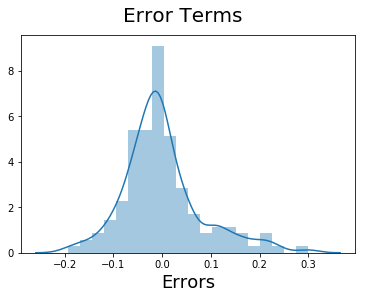

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Making Predictions
### Applying the scaling on the test sets

In [85]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [86]:
y_test = df_test.pop('price')
X_test = df_test

In [87]:
X_train_new5.columns

Index(['const', 'enginelocation', 'enginesize', 'cylindernumber_2',
       'CarName_bmw', 'CarName_buick'],
      dtype='object')

In [88]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new5 = X_train_new5.drop(['const'], axis=1)
X_test_new = X_test[X_train_new5.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [89]:
X_test_new.columns

Index(['const', 'enginelocation', 'enginesize', 'cylindernumber_2',
       'CarName_bmw', 'CarName_buick'],
      dtype='object')

In [90]:
# Making predictions
y_pred = lm6.predict(X_test_new)

## Model Evaluation

Text(0,0.5,'price_pred')

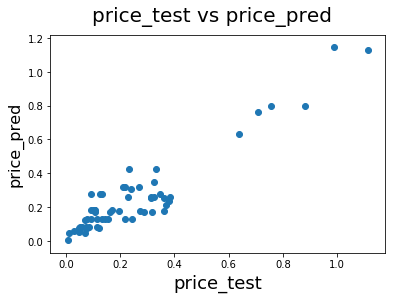

In [91]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('price_test vs price_pred', fontsize=20)              # Plot heading 
plt.xlabel('price_test', fontsize=18)                          # X-label
plt.ylabel('price_pred', fontsize=16)                          # Y-label

In [92]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.8704151811585618


Text(0,0.5,'Price')

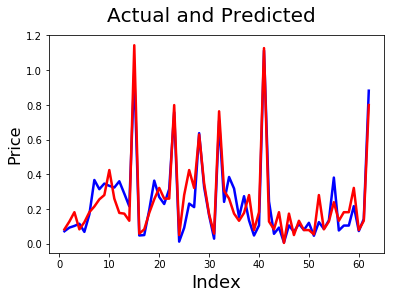

In [96]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=16)                               # Y-Label

Text(0,0.5,'Actual_Price - Predicted_Price')

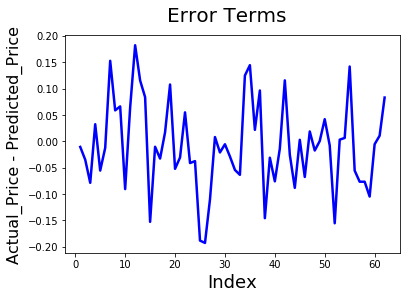

In [94]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test - y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual_Price - Predicted_Price', fontsize=16)                # Y-label

# Inferences
The important predictor variables as found through this model are as follows

enginelocation      
enginesize           
cylindernumber_2     
CarName_bmw          
CarName_buick    

 R-squared              :  0.857 (85.7% ~ )
        
The Adjusted R-Square is : 0.852 (85.2%)

The Predicted R-Square is : 0.8704151811585618 (87.04%)

The following points can be derived:

1. The coulmn 'enginesize' having the highest VIF value.
2. Brand name plays a significant role in the price of a car.
3. The number of cylinders also has a significant affect on the price of the car. 


## Suggestions:

1. Treat enginesize as a main factor.
2. Position the brand similar to popular brands and expect stiff competetion from other brands in the segment.